In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

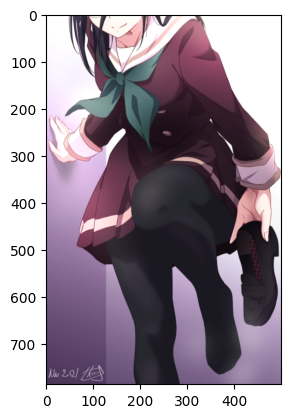

In [2]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# floodFill

这里mask的作用是限制填充的范围，即floodFill只会填充处理对象对应的mask为0的区域，
注意，作用范围是整张图片不代表会填充整张图，同时还要满足像素和填充颜色的像素差在[loDiff，upDiff]范围内）

(787, 500, 3) (789, 502)


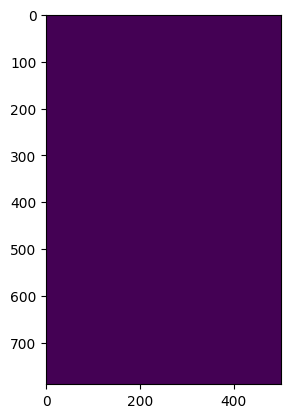

In [24]:
# 根据图片形状建一个掩膜,注意,长和宽必须要+2,类型只能是uint8
mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), dtype=np.uint8)
print(image.shape, mask.shape)
plt.imshow(mask)

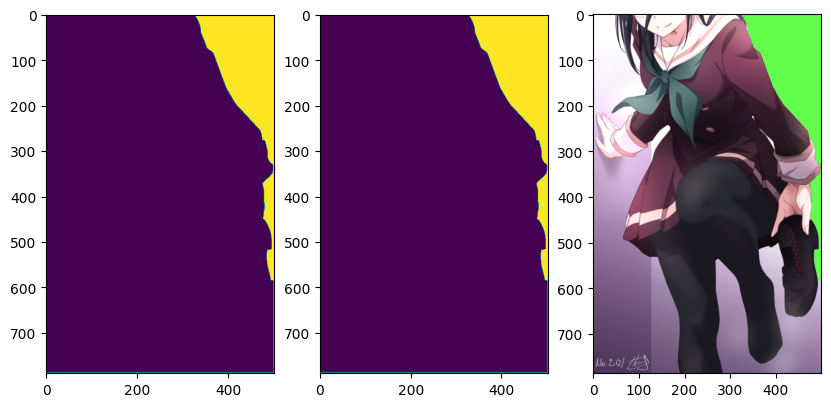

In [25]:
retval, image1, mask1, rect = cv2.floodFill(
    image=image.copy(),
    mask=mask,                          # mask也会被更改
    seedPoint=(400, 100),               # 填充起点
    newVal=(100, 255, 75),              # 填充颜色
    loDiff=(50, 50, 50),                # loDiff和upDiff相当于填充的像素范围区间,即 [填充颜色-loDiff, 填充颜色+upDiff]
    upDiff=(50, 50, 50),                # 填充时上限像素的差
    flags=cv2.FLOODFILL_FIXED_RANGE,    # 填充的方式: FLOODFILL_FIXED_RANGE 和 FLOODFILL_MASK_ONLY
)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
axes[0].imshow(mask)    # mask也会被更改
axes[1].imshow(mask1)
axes[2].imshow(image1)

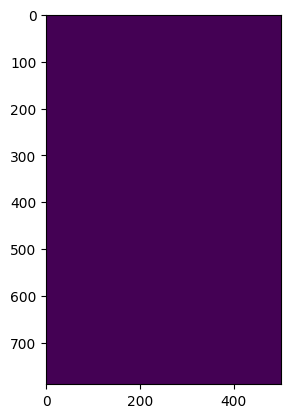

In [17]:
# 根据图片形状建一个掩膜,注意,长和宽必须要+2,类型只能是uint8
mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), dtype=np.uint8)
plt.imshow(mask)

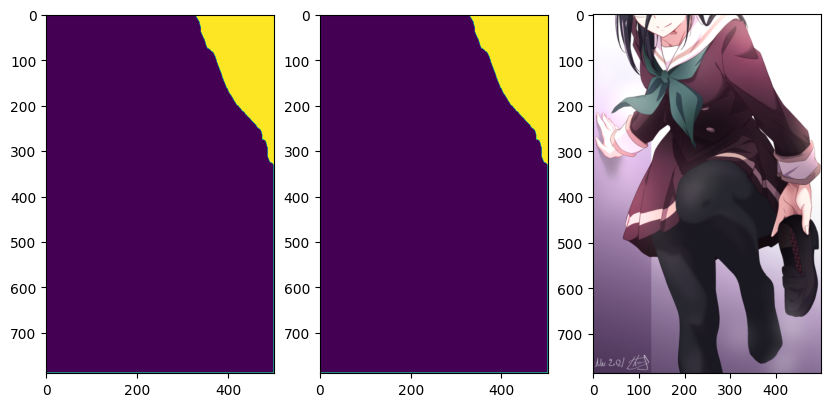

In [18]:
retval, image1, mask1, rect = cv2.floodFill(
    image=image.copy(),
    mask=mask,
    seedPoint=(400, 100),               # 填充的起点
    newVal=(100, 255, 75),              # 填充的颜色
    flags=cv2.FLOODFILL_MASK_ONLY,      # 填充的方式: FLOODFILL_FIXED_RANGE 和 FLOODFILL_MASK_ONLY
    # FLOODFILL_MASK_ONLY 可以理解为强制填充,即不需要loDiff和upDiff,范围内全部强制填充,但是有个前提,就是floodFill不会填充他认为不需要填充的地方
)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
axes[0].imshow(mask)    # mask也会被更改
axes[1].imshow(mask1)
axes[2].imshow(image1)